In [13]:
import MDAnalysis as mda
import glob
#from MDAnalysis.tests.datafiles import PSF, DCD, CRD, DCD2, PDB_small
from MDAnalysis.analysis import distances,diffusionmap, align, rms,contacts,dihedrals, encore
from MDAnalysis.analysis.rms import RMSF
import MDAnalysis.analysis.pca as pca
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from mpl_toolkits.axisartist.parasite_axes import SubplotHost
import matplotlib.pylab as pylab
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from itertools import product
import timeit
import time
import math
import os
import seaborn as sns
import pandas as pd
import csv
import sklearn
import scipy as sp
from scipy.stats import entropy
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial import Voronoi,voronoi_plot_2d
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
import csv
from matplotlib.colors import to_rgb
from matplotlib.collections import PolyCollection
from matplotlib.legend_handler import HandlerTuple
import scipy.signal as sig
from scipy.stats import gaussian_kde
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [14]:
def calc_rmsd_reps(u_traj,u_ref,title,state):
    
    selections = ['backbone and (resid 1-306)', #3
                  'backbone and (resid 8-101)', #Domain I:  #4
                 'backbone and (resid 102-184)', #Domain II:  #5
                 'backbone and (resid 201-303)'] #Domain III: #6
    
    #selections = ['backbone and (resid 8-101) or resid 314-407)', #Domain I:  
     #            'backbone and (resid 102-184) or resid 408-490)', #Domain II: 
        #           'backbone and (resid 201-303) or resid 507-608)'] #Domain III:
    
    if state == 'monomer':
        R = mda.analysis.rms.RMSD(u_traj,u_ref,
                                 select="backbone",
                                 groupselections= selections)
        R.run(start=0,stop=1000)
        
        with open('{}_rmsd_all.npy'.format(title),'wb') as f:
            np.save(f,R.rmsd)
        print("Finished") 

    elif state == 'dimer':
        R = mda.analysis.rms.RMSD(u_traj,u_ref,
                                 select="backbone",
                                 groupselections= selections)
        R.run(start=0,stop=1000)
        
        with open('{}_rmsd_all.npy'.format(title),'wb') as f:
            np.save(f,R.rmsd)
        print("Finished")
        
    return(R.rmsd)

### Define Paths

In [22]:
os.listdir('../../Projects/Mpro_MD_dry/mpro_apo/mpro_apo_monomer')

['mpro_apo_monomer_prod_aligned_dry_1.nc',
 'mpro_apo_monomer_dry.prmtop',
 'mpro_apo_monomer_correl.dat',
 'mpro_apo_monomer_prod_aligned_dry_3.nc',
 'mpro_apo_monomer_prod_aligned_dry_2.nc',
 'mpro_apo_monomer.pdb']

In [25]:

apo_mono_ref_path = glob.glob('../../Projects/Mpro_MD_test/mpro_apo/mpro_apo_monomer/*.pdb')
apo_mono_prmtop_path = glob.glob('../../Projects/Mpro_MD_test/mpro_apo/mpro_apo_monomer/*prmtop')
apo_mono_prod_path = glob.glob('../../Projects/Mpro_MD_test/mpro_apo/mpro_apo_monomer/*.nc')
apo_mono_prod = {1:apo_mono_prod_path[0], 2:apo_mono_prod_path[1], 3:apo_mono_prod_path[2]}

apo_dimer_ref_path = glob.glob('../../Projects/Mpro_MD_test/mpro_apo/mpro_apo_dimer/*.pdb')
apo_dimer_prmtop_path = glob.glob('../../Projects/Mpro_MD_test/mpro_apo/mpro_apo_dimer/*prmtop')
apo_dimer_prod_path = glob.glob('../../Projects/Mpro_MD_test/mpro_apo/mpro_apo_dimer/*.nc')
apo_dimer_prod = {1:apo_dimer_prod_path[0], 2:apo_dimer_prod_path[1], 3:apo_dimer_prod_path[2]}

### Create Universe

In [26]:
print(apo_dimer_prmtop_path[0])

../../Projects/Mpro_MD_test/mpro_apo/mpro_apo_dimer/mpro_apo_dimer_dry.prmtop


In [27]:
apo_mono_ref = mda.Universe(apo_mono_prmtop_path[0], apo_mono_ref_path[0])
apo_mono_1 = mda.Universe(apo_mono_prmtop_path[0], apo_mono_prod[1])
apo_mono_2 = mda.Universe(apo_mono_prmtop_path[0], apo_mono_prod[2])
apo_mono_3 = mda.Universe(apo_mono_prmtop_path[0], apo_mono_prod[3])

In [28]:
apo_dimer_ref = mda.Universe(apo_dimer_prmtop_path[0], apo_dimer_ref_path[0])
apo_dimer_1 = mda.Universe(apo_dimer_prmtop_path[0], apo_dimer_prod[1])
apo_dimer_2 = mda.Universe(apo_dimer_prmtop_path[0], apo_dimer_prod[2])
apo_dimer_3 = mda.Universe(apo_dimer_prmtop_path[0], apo_dimer_prod[3])

### Calculate RMSD

In [29]:
apo_mono_rmsd_1 = calc_rmsd_reps(apo_mono_1, apo_mono_ref, "apo_mono_1", "monomer")
apo_mono_rmsd_2 = calc_rmsd_reps(apo_mono_2, apo_mono_ref, "apo_mono_2", "monomer")
apo_mono_rmsd_3 = calc_rmsd_reps(apo_mono_3, apo_mono_ref, "apo_mono_3", "monomer")

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


Finished
Finished
Finished


In [30]:
apo_dimer_rmsd_1 = calc_rmsd_reps(apo_dimer_1, apo_dimer_ref, "apo_dimer_1", "dimer")
apo_dimer_rmsd_2 = calc_rmsd_reps(apo_dimer_2, apo_dimer_ref, "apo_dimer_2", "dimer")
apo_dimer_rmsd_3 = calc_rmsd_reps(apo_dimer_3, apo_dimer_ref, "apo_dimer_3", "dimer")

Finished
Finished
Finished


### Plot global RMSD

In [39]:
apo_mono_rmsd_1[:,3]

array([3.63943307, 3.64195045, 3.81518053, 3.77421553, 4.08309042,
       3.98772451, 3.97893042, 4.07877563, 3.94559574, 4.01574964,
       3.90264783, 4.12170364, 4.01108512, 3.97781932, 4.26428475,
       4.29794544, 4.30026818, 4.38974686, 4.51002499, 4.64827375,
       4.72188453, 4.42598736, 4.66976747, 4.39130522, 4.52886818,
       4.19022585, 4.2629231 , 4.49959554, 4.6791497 , 4.49355602,
       4.76727946, 4.50989514, 4.84540301, 4.72306065, 4.64845231,
       4.64635049, 4.46922166, 4.83517409, 4.49969404, 4.38755521,
       4.4792227 , 4.71128556, 4.94284673, 4.64595228, 4.36995579,
       4.49093041, 4.5134988 , 4.52032241, 4.39005415, 4.30304373,
       3.98829921, 4.16201431, 4.09921542, 4.35209717, 4.46650196,
       4.34913633, 4.51516429, 4.45417639, 4.41418784, 4.43908074,
       4.62913116, 4.37572704, 4.52607047, 4.54274014, 4.36537247,
       4.76538406, 4.4949134 , 4.61672742, 4.48325055, 4.46067466,
       4.41489679, 4.64796551, 4.58780069, 4.52196798, 4.41153

(0.0, 10.0)

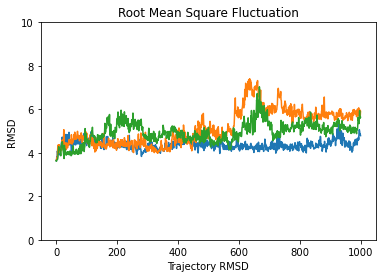

In [40]:
plt.plot(apo_mono_rmsd_1[:,0],apo_mono_rmsd_1[:,3])
plt.plot(apo_mono_rmsd_2[:,0],apo_mono_rmsd_2[:,3])
plt.plot(apo_mono_rmsd_3[:,0],apo_mono_rmsd_3[:,3])
plt.title('Root Mean Square Fluctuation')
plt.ylabel('RMSD')
plt.xlabel('Trajectory RMSD')
plt.ylim(0,10)

In [16]:
pwd

'/net/gpfs-amarolab/jsanlleyhernandez/notebooks/fiona_notebooks'

In [1]:
plt.plot(apo_dimer_rmsd_1[:,0],apo_dimer_rmsd_1[:,3])
plt.plot(apo_dimer_rmsd_2[:,0],apo_dimer_rmsd_2[:,3])
plt.plot(apo_dimer_rmsd_3[:,0],apo_dimer_rmsd_3[:,3])
plt.title('Root Mean Square Fluctuation')
plt.ylabel('RMSD')
plt.xlabel('Trajectory RMSD')
plt.ylim(0,10)
plt.savefig('mpro_apo_dimer_rmsd.png')

NameError: name 'plt' is not defined

In [159]:
def plot(wt,dm,delP168,a173v,title):
    params = {
         'font.family': 'sans-serif',
         'font.sans-serif': 'Arial',
         'legend.fontsize': '36',
         #'figure.figsize': (24,12),
         'axes.labelsize': '40',
         'axes.titlesize': '40',
         'xtick.labelsize': '24',
         'ytick.labelsize': '24'
         #'xtick.size': '30'
         #'ytick.size': '30'
    }
    pylab.rcParams.update(params)
    
    wta1,wtb1,wta2,wtb2,wta3,wtb3=wt
    dma1,dmb1,dma2,dmb2,dma3,dmb3=dm
    delP168a1,delP168b1,delP168a2,delP168b2,delP168a3,delP168b3=delP168
    a173va1,a173vb1,a173va2,a173vb2,a173va3,a173vb3=a173v
    
    def calc_avg(a1,b1,a2,b2,a3,b3):
        avg=[]
        for i in range(len(a1[:,2])):
            avg.append((a1[i,0],a1[i,1],np.mean((a1[i,2],b1[i,2],a2[i,2],b2[i,2],a3[i,2],b3[i,2]))))
        avg=np.array(avg).reshape(len(a1[:,2]),3)
        return(avg)
    
    wt_avg=calc_avg(wta1,wtb1,wta2,wtb2,wta3,wtb3)
    dm_avg=calc_avg(dma1,dmb1,dma2,dmb2,dma3,dmb3)
    delP168_avg=calc_avg(delP168a1,delP168b1,delP168a2,delP168b2,delP168a3,delP168b3)
    a173v_avg=calc_avg(a173va1,a173vb1,a173va2,a173vb2,a173va3,a173vb3)
    
    def roll(a,n):
        #'scipy.convolve'
        assert n%2==1
        return np.convolve(a,np.ones(n,dtype='float')/n, 'same')[n//2:-n//2+1]  
    
    w=1001
    w1=w-1
    
    #fig = plt.figure(figsize=(12,8))
    fig, axs = plt.subplots(4,4, sharex=True, sharey=True, tight_layout=True, figsize=(24,12))
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    
    axs[0,0].set_xlim([0,550])
    axs[0,0].set_ylim([0,4])
    rect1=patch.Rectangle((0,0),50,5,color='yellow',alpha=0.2)
    axs[0,0].add_patch(rect1)
    axs[0,0].axvline(x=50,color='k',linestyle='--')
    rect1=patch.Rectangle((0,0),50,5,color='yellow',alpha=0.2)
    axs[0,1].add_patch(rect1)
    axs[0,1].axvline(x=50,color='k',linestyle='--')
    rect1=patch.Rectangle((0,0),50,5,color='yellow',alpha=0.2)
    axs[0,2].add_patch(rect1)
    axs[0,2].axvline(x=50,color='k',linestyle='--')
    rect1=patch.Rectangle((0,0),50,5,color='yellow',alpha=0.2)
    axs[0,3].add_patch(rect1)
    axs[0,3].axvline(x=50,color='k',linestyle='--')
    rect1=patch.Rectangle((0,0),50,5,color='yellow',alpha=0.2)
    axs[1,0].add_patch(rect1)
    axs[1,0].axvline(x=50,color='k',linestyle='--')
    rect1=patch.Rectangle((0,0),50,5,color='yellow',alpha=0.2)
    axs[1,1].add_patch(rect1)
    axs[1,1].axvline(x=50,color='k',linestyle='--')
    rect1=patch.Rectangle((0,0),50,5,color='yellow',alpha=0.2)
    axs[1,2].add_patch(rect1)
    axs[1,2].axvline(x=50,color='k',linestyle='--')
    rect1=patch.Rectangle((0,0),50,5,color='yellow',alpha=0.2)
    axs[1,3].add_patch(rect1)
    axs[1,3].axvline(x=50,color='k',linestyle='--')
    rect1=patch.Rectangle((0,0),50,5,color='yellow',alpha=0.2)
    axs[2,0].add_patch(rect1)
    axs[2,0].axvline(x=50,color='k',linestyle='--')
    rect1=patch.Rectangle((0,0),50,5,color='yellow',alpha=0.2)
    axs[2,1].add_patch(rect1)
    axs[2,1].axvline(x=50,color='k',linestyle='--')
    rect1=patch.Rectangle((0,0),50,5,color='yellow',alpha=0.2)
    axs[2,2].add_patch(rect1)
    axs[2,2].axvline(x=50,color='k',linestyle='--')
    rect1=patch.Rectangle((0,0),50,5,color='yellow',alpha=0.2)
    axs[2,3].add_patch(rect1)
    axs[2,3].axvline(x=50,color='k',linestyle='--')
    rect1=patch.Rectangle((0,0),50,5,color='yellow',alpha=0.2)
    axs[3,0].add_patch(rect1)
    axs[3,0].axvline(x=50,color='k',linestyle='--')
    rect1=patch.Rectangle((0,0),50,5,color='yellow',alpha=0.2)
    axs[3,1].add_patch(rect1)
    axs[3,1].axvline(x=50,color='k',linestyle='--')
    rect1=patch.Rectangle((0,0),50,5,color='yellow',alpha=0.2)
    axs[3,2].add_patch(rect1)
    axs[3,2].axvline(x=50,color='k',linestyle='--')
    rect1=patch.Rectangle((0,0),50,5,color='yellow',alpha=0.2)
    axs[3,3].add_patch(rect1)
    axs[3,3].axvline(x=50,color='k',linestyle='--')
    
    legend_patch = mpatches.Patch(facecolor='yellow',alpha=0.2,linestyle='--',edgecolor='k',label='50ns Equil')
    
    axs[0,0].plot(wta1[:,0]*5/1000,wta1[:,2],'cornflowerblue',alpha=0.4,linewidth=2)
    p1, = axs[0,0].plot(wta1[w1:,0]*5/1000,roll(wta1[:,2],w),'cornflowerblue',alpha=1.0,linewidth=4,label='Chain A')
    axs[0,0].plot(wtb1[:,0]*5/1000,wtb1[:,2],'saddlebrown',alpha=0.4,linewidth=2)
    p2, = axs[0,0].plot(wtb1[w1:,0]*5/1000,roll(wtb1[:,2],w),'saddlebrown',alpha=1.0,linewidth=4,label='Chain B')
    axs[0,1].plot(a173va1[:,0]*5/1000,a173va1[:,2],'cornflowerblue',alpha=0.4,linewidth=2)
    axs[0,1].plot(a173va1[w1:,0]*5/1000,roll(a173va1[:,2],w),'cornflowerblue',alpha=1.0,linewidth=4,label='Chain A')
    axs[0,1].plot(a173vb1[:,0]*5/1000,a173vb1[:,2],'saddlebrown',alpha=0.4,linewidth=2)
    axs[0,1].plot(a173vb1[w1:,0]*5/1000,roll(a173vb1[:,2],w),'saddlebrown',alpha=1.0,linewidth=4,label='Chain B')
    axs[0,2].plot(delP168a1[:,0]*5/1000,delP168a1[:,2],'cornflowerblue',alpha=0.4,linewidth=2)
    axs[0,2].plot(delP168a1[w1:,0]*5/1000,roll(delP168a1[:,2],w),'cornflowerblue',alpha=1.0,linewidth=4,label='Chain A')
    axs[0,2].plot(delP168b1[:,0]*5/1000,delP168b1[:,2],'saddlebrown',alpha=0.4,linewidth=2)
    axs[0,2].plot(delP168b1[w1:,0]*5/1000,roll(delP168b1[:,2],w),'saddlebrown',alpha=1.0,linewidth=4,label='Chain B')
    axs[0,3].plot(dma1[:,0]*5/1000,dma1[:,2],'cornflowerblue',alpha=0.4,linewidth=2)
    axs[0,3].plot(dma1[w1:,0]*5/1000,roll(dma1[:,2],w),'cornflowerblue',alpha=1.0,linewidth=4,label='Chain A')
    axs[0,3].plot(dmb1[:,0]*5/1000,dmb1[:,2],'saddlebrown',alpha=0.4,linewidth=2)
    axs[0,3].plot(dmb1[w1:,0]*5/1000,roll(dmb1[:,2],w),'saddlebrown',alpha=1.0,linewidth=4,label='Chain B')
    
    axs[1,0].plot(wta2[:,0]*5/1000,wta2[:,2],'cornflowerblue',alpha=0.4,linewidth=2)
    axs[1,0].plot(wta2[w1:,0]*5/1000,roll(wta2[:,2],w),'cornflowerblue',alpha=1.0,linewidth=4,label='Chain A')
    axs[1,0].plot(wtb2[:,0]*5/1000,wtb2[:,2],'saddlebrown',alpha=0.4,linewidth=2)
    axs[1,0].plot(wtb2[w1:,0]*5/1000,roll(wtb2[:,2],w),'saddlebrown',alpha=1.0,linewidth=4,label='Chain B')
    axs[1,1].plot(a173va2[:,0]*5/1000,a173va2[:,2],'cornflowerblue',alpha=0.4,linewidth=2)
    axs[1,1].plot(a173va2[w1:,0]*5/1000,roll(a173va2[:,2],w),'cornflowerblue',alpha=1.0,linewidth=4,label='Chain A')
    axs[1,1].plot(a173vb2[:,0]*5/1000,a173vb2[:,2],'saddlebrown',alpha=0.4,linewidth=2)
    axs[1,1].plot(a173vb2[w1:,0]*5/1000,roll(a173vb2[:,2],w),'saddlebrown',alpha=1.0,linewidth=4,label='Chain B')
    axs[1,2].plot(delP168a2[:,0]*5/1000,delP168a2[:,2],'cornflowerblue',alpha=0.4,linewidth=2)
    axs[1,2].plot(delP168a2[w1:,0]*5/1000,roll(delP168a2[:,2],w),'cornflowerblue',alpha=1.0,linewidth=4,label='Chain A')
    axs[1,2].plot(delP168b2[:,0]*5/1000,delP168b2[:,2],'saddlebrown',alpha=0.4,linewidth=2)
    axs[1,2].plot(delP168b2[w1:,0]*5/1000,roll(delP168b2[:,2],w),'saddlebrown',alpha=1.0,linewidth=4,label='Chain B')
    axs[1,3].plot(dma2[:,0]*5/1000,dma2[:,2],'cornflowerblue',alpha=0.4,linewidth=2)
    axs[1,3].plot(dma2[w1:,0]*5/1000,roll(dma2[:,2],w),'cornflowerblue',alpha=1.0,linewidth=4,label='Chain A')
    axs[1,3].plot(dmb2[:,0]*5/1000,dmb2[:,2],'saddlebrown',alpha=0.4,linewidth=2)
    axs[1,3].plot(dmb2[w1:,0]*5/1000,roll(dmb2[:,2],w),'saddlebrown',alpha=1.0,linewidth=4,label='Chain B')
    
    axs[2,0].plot(wta3[:,0]*5/1000,wta3[:,2],'cornflowerblue',alpha=0.4,linewidth=2)
    axs[2,0].plot(wta3[w1:,0]*5/1000,roll(wta3[:,2],w),'cornflowerblue',alpha=1.0,linewidth=4,label='Chain A')
    axs[2,0].plot(wtb3[:,0]*5/1000,wtb3[:,2],'saddlebrown',alpha=0.4,linewidth=2)
    axs[2,0].plot(wtb3[w1:,0]*5/1000,roll(wtb3[:,2],w),'saddlebrown',alpha=1.0,linewidth=4,label='Chain B')
    axs[2,1].plot(a173va3[:,0]*5/1000,a173va3[:,2],'cornflowerblue',alpha=0.4,linewidth=2)
    axs[2,1].plot(a173va3[w1:,0]*5/1000,roll(a173va3[:,2],w),'cornflowerblue',alpha=1.0,linewidth=4,label='Chain A')
    axs[2,1].plot(a173vb3[:,0]*5/1000,a173vb3[:,2],'saddlebrown',alpha=0.4,linewidth=2)
    axs[2,1].plot(a173vb3[w1:,0]*5/1000,roll(a173vb3[:,2],w),'saddlebrown',alpha=1.0,linewidth=4,label='Chain B')
    axs[2,2].plot(delP168a3[:,0]*5/1000,delP168a3[:,2],'cornflowerblue',alpha=0.4,linewidth=2)
    axs[2,2].plot(delP168a3[w1:,0]*5/1000,roll(delP168a3[:,2],w),'cornflowerblue',alpha=1.0,linewidth=4,label='Chain A')
    axs[2,2].plot(delP168b3[:,0]*5/1000,delP168b3[:,2],'saddlebrown',alpha=0.4,linewidth=2)
    axs[2,2].plot(delP168b3[w1:,0]*5/1000,roll(delP168b3[:,2],w),'saddlebrown',alpha=1.0,linewidth=4,label='Chain B')
    axs[2,3].plot(dma3[:,0]*5/1000,dma3[:,2],'cornflowerblue',alpha=0.4,linewidth=2)
    axs[2,3].plot(dma3[w1:,0]*5/1000,roll(dma3[:,2],w),'cornflowerblue',alpha=1.0,linewidth=4,label='Chain A')
    axs[2,3].plot(dmb3[:,0]*5/1000,dmb3[:,2],'saddlebrown',alpha=0.4,linewidth=2)
    axs[2,3].plot(dmb3[w1:,0]*5/1000,roll(dmb3[:,2],w),'saddlebrown',alpha=1.0,linewidth=4,label='Chain B')
    
    axs[3,0].plot(wt_avg[:,0]*5/1000,wt_avg[:,2],'black',alpha=0.4,linewidth=2)
    p3,=axs[3,0].plot(wt_avg[w1:,0]*5/1000,roll(wt_avg[:,2],w),'black',alpha=1.0,linewidth=4,label='Average')
    axs[3,1].plot(a173v_avg[:,0]*5/1000,a173v_avg[:,2],'black',alpha=0.4,linewidth=2)
    axs[3,1].plot(a173v_avg[w1:,0]*5/1000,roll(a173v_avg[:,2],w),'black',alpha=1.0,linewidth=4,label='Average')
    axs[3,2].plot(delP168_avg[:,0]*5/1000,delP168_avg[:,2],'black',alpha=0.4,linewidth=2)
    axs[3,2].plot(delP168_avg[w1:,0]*5/1000,roll(delP168_avg[:,2],w),'black',alpha=1.0,linewidth=4,label='Average')
    axs[3,3].plot(dm_avg[:,0]*5/1000,dm_avg[:,2],'black',alpha=0.4,linewidth=2)
    axs[3,3].plot(dm_avg[w1:,0]*5/1000,roll(dm_avg[:,2],w),'black',alpha=1.0,linewidth=4,label='Average')
     
    axs[0,0].set_title("WT")
    axs[0,1].set_title("A173V")
    axs[0,2].set_title("$\Delta$P168")
    axs[0,3].set_title("DM")
    
    axs[0,0].set_ylabel("Rep1")
    axs[1,0].set_ylabel("Rep2")
    axs[2,0].set_ylabel("Rep3")
    axs[3,0].set_ylabel("Avg")
    plt.ylabel("RMSD ($\AA{}$)",labelpad=46)
    plt.xlabel("Time (ns)")
    
    #plt.legend(fontsize=36)
    lgd=plt.legend(handles=[p1, p2, p3,legend_patch], bbox_to_anchor=(0.9,-0.1),ncol=4,fancybox=True,fontsize=36)
    fig.tight_layout()
    plt.savefig('{}_rmsd.png'.format(title),bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=300)

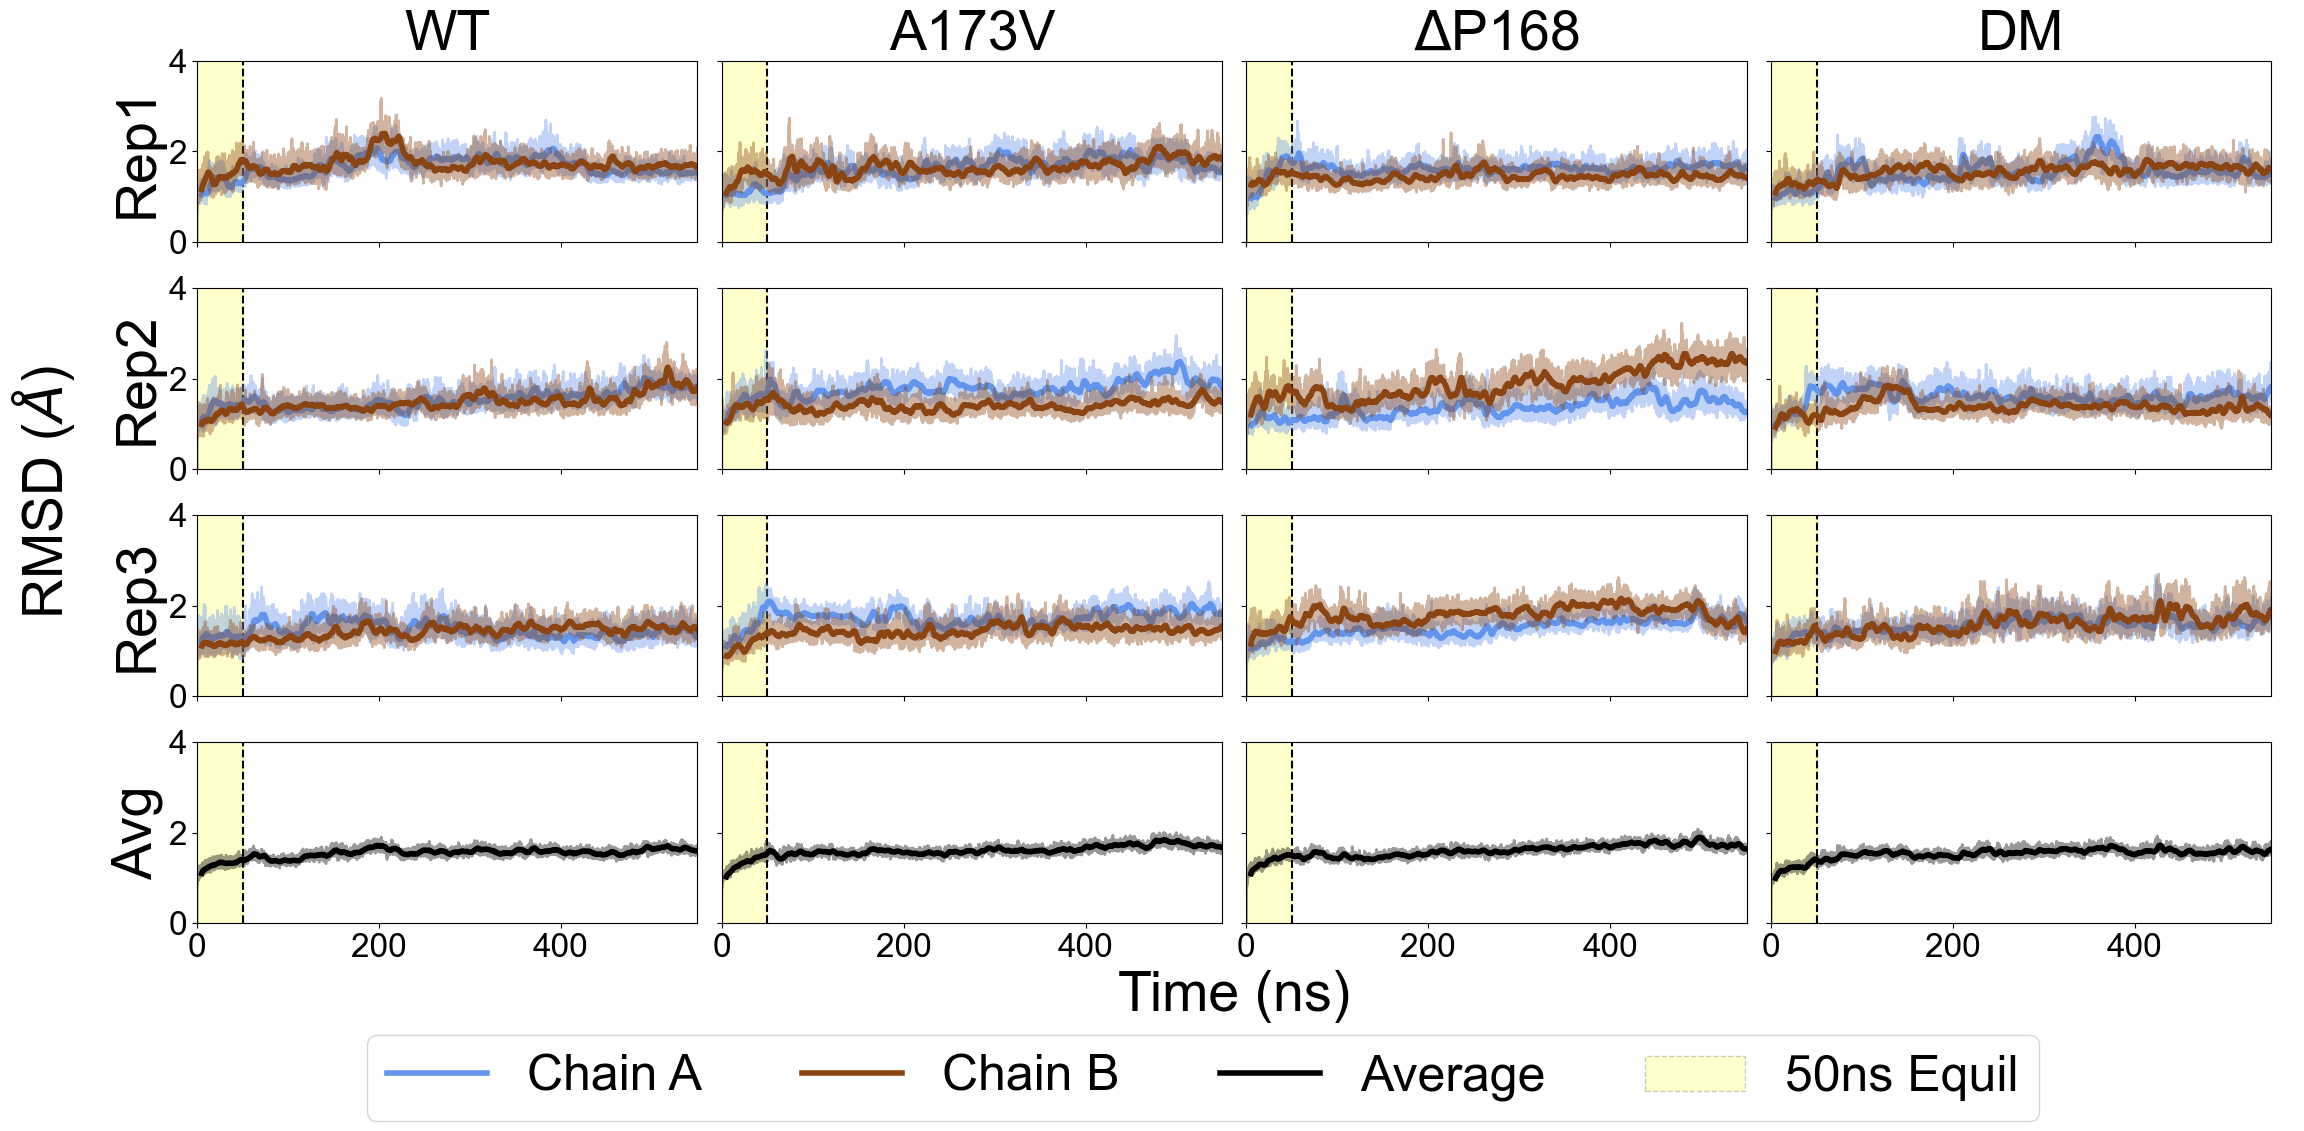

In [160]:
plot(wt,dm,delP168,a173v,"wt_dm_delP168_a173v")

In [83]:
wta1,wtb1,wta2,wtb2,wta3,wtb3=wt
wt_avg=np.mean((wta1,wtb1,wta2,wtb2,wta3,wtb3))

In [90]:
def calc_avg(a1,b1,a2,b2,a3,b3):
    avg=[]
    for i in range(len(a1[:,2])):
        avg.append((a1[i,0],a1[i,1],np.mean((a1[i,2],b1[i,2],a2[i,2],b2[i,2],a3[i,2],b3[i,2]))))
    avg=np.array(avg).reshape(len(a1[:,2]),3)
    return(avg)

In [91]:
test=calc_avg(wta1,wtb1,wta2,wtb2,wta3,wtb3)

In [94]:
print(test.shape)

(110000, 3)


In [84]:
print(wt_avg)

14422.96007428542


In [5]:
path='/net/gpfs-amarolab/fiona/sars-cov-2/protease/dimer/analysis/'

In [8]:
u_wt_chaina_r1_ref=mda.Universe(path+'wt_mpro_chainA_rep1.pr5.aligned_CA.not_waters_or_ions.psf',path+'wt_mpro_chainA_rep1.pr5.aligned_CA.not_waters.frame0.pdb')
u_wt_chainb_r1_ref=mda.Universe(path+'wt_mpro_chainB_rep1.pr5.aligned_CA.not_waters_or_ions.psf',path+'wt_mpro_chainB_rep1.pr5.aligned_CA.not_waters.frame0.pdb')
u_wt_chaina_r1_trj=mda.Universe(path+'wt_mpro_chainA_rep1.pr5.aligned_CA.not_waters_or_ions.psf',path+'wt_mpro_chainA_rep1.pr5.aligned_CA.not_waters.dcd')
u_wt_chainb_r1_trj=mda.Universe(path+'wt_mpro_chainB_rep1.pr5.aligned_CA.not_waters_or_ions.psf',path+'wt_mpro_chainB_rep1.pr5.aligned_CA.not_waters.dcd')

u_wt_chaina_r2_ref=mda.Universe(path+'wt_mpro_chainA_rep2.pr5.aligned_CA.not_waters_or_ions.psf',path+'wt_mpro_chainA_rep2.pr5.aligned_CA.not_waters.frame0.pdb')
u_wt_chainb_r2_ref=mda.Universe(path+'wt_mpro_chainB_rep2.pr5.aligned_CA.not_waters_or_ions.psf',path+'wt_mpro_chainB_rep2.pr5.aligned_CA.not_waters.frame0.pdb')
u_wt_chaina_r2_trj=mda.Universe(path+'wt_mpro_chainA_rep2.pr5.aligned_CA.not_waters_or_ions.psf',path+'wt_mpro_chainA_rep2.pr5.aligned_CA.not_waters.dcd')
u_wt_chainb_r2_trj=mda.Universe(path+'wt_mpro_chainB_rep2.pr5.aligned_CA.not_waters_or_ions.psf',path+'wt_mpro_chainB_rep2.pr5.aligned_CA.not_waters.dcd')

u_wt_chaina_r3_ref=mda.Universe(path+'wt_mpro_chainA_rep3.pr5.aligned_CA.not_waters_or_ions.psf',path+'wt_mpro_chainA_rep3.pr5.aligned_CA.not_waters.frame0.pdb')
u_wt_chainb_r3_ref=mda.Universe(path+'wt_mpro_chainB_rep3.pr5.aligned_CA.not_waters_or_ions.psf',path+'wt_mpro_chainB_rep3.pr5.aligned_CA.not_waters.frame0.pdb')
u_wt_chaina_r3_trj=mda.Universe(path+'wt_mpro_chainA_rep3.pr5.aligned_CA.not_waters_or_ions.psf',path+'wt_mpro_chainA_rep3.pr5.aligned_CA.not_waters.dcd')
u_wt_chainb_r3_trj=mda.Universe(path+'wt_mpro_chainB_rep3.pr5.aligned_CA.not_waters_or_ions.psf',path+'wt_mpro_chainB_rep3.pr5.aligned_CA.not_waters.dcd')

In [9]:
u_dm_chaina_r1_ref=mda.Universe(path+'dm_mpro_chainA_rep1.pr5.aligned_CA.not_waters_or_ions.psf',path+'dm_mpro_chainA_rep1.pr5.aligned_CA.not_waters.frame0.pdb')
u_dm_chainb_r1_ref=mda.Universe(path+'dm_mpro_chainB_rep1.pr5.aligned_CA.not_waters_or_ions.psf',path+'dm_mpro_chainB_rep1.pr5.aligned_CA.not_waters.frame0.pdb')
u_dm_chaina_r1_trj=mda.Universe(path+'dm_mpro_chainA_rep1.pr5.aligned_CA.not_waters_or_ions.psf',path+'dm_mpro_chainA_rep1.pr5.aligned_CA.not_waters.dcd')
u_dm_chainb_r1_trj=mda.Universe(path+'dm_mpro_chainB_rep1.pr5.aligned_CA.not_waters_or_ions.psf',path+'dm_mpro_chainB_rep1.pr5.aligned_CA.not_waters.dcd')

u_dm_chaina_r2_ref=mda.Universe(path+'dm_mpro_chainA_rep2.pr5.aligned_CA.not_waters_or_ions.psf',path+'dm_mpro_chainA_rep2.pr5.aligned_CA.not_waters.frame0.pdb')
u_dm_chainb_r2_ref=mda.Universe(path+'dm_mpro_chainB_rep2.pr5.aligned_CA.not_waters_or_ions.psf',path+'dm_mpro_chainB_rep2.pr5.aligned_CA.not_waters.frame0.pdb')
u_dm_chaina_r2_trj=mda.Universe(path+'dm_mpro_chainA_rep2.pr5.aligned_CA.not_waters_or_ions.psf',path+'dm_mpro_chainA_rep2.pr5.aligned_CA.not_waters.dcd')
u_dm_chainb_r2_trj=mda.Universe(path+'dm_mpro_chainB_rep2.pr5.aligned_CA.not_waters_or_ions.psf',path+'dm_mpro_chainB_rep2.pr5.aligned_CA.not_waters.dcd')

u_dm_chaina_r3_ref=mda.Universe(path+'dm_mpro_chainA_rep3.pr5.aligned_CA.not_waters_or_ions.psf',path+'dm_mpro_chainA_rep3.pr5.aligned_CA.not_waters.frame0.pdb')
u_dm_chainb_r3_ref=mda.Universe(path+'dm_mpro_chainB_rep3.pr5.aligned_CA.not_waters_or_ions.psf',path+'dm_mpro_chainB_rep3.pr5.aligned_CA.not_waters.frame0.pdb')
u_dm_chaina_r3_trj=mda.Universe(path+'dm_mpro_chainA_rep3.pr5.aligned_CA.not_waters_or_ions.psf',path+'dm_mpro_chainA_rep3.pr5.aligned_CA.not_waters.dcd')
u_dm_chainb_r3_trj=mda.Universe(path+'dm_mpro_chainB_rep3.pr5.aligned_CA.not_waters_or_ions.psf',path+'dm_mpro_chainB_rep3.pr5.aligned_CA.not_waters.dcd')

In [10]:
u_delP168_chaina_r1_ref=mda.Universe(path+'delP168_mpro_chainA_rep1.pr5.aligned_CA.not_waters_or_ions.psf',path+'delP168_mpro_chainA_rep1.pr5.aligned_CA.not_waters.frame0.pdb')
u_delP168_chainb_r1_ref=mda.Universe(path+'delP168_mpro_chainB_rep1.pr5.aligned_CA.not_waters_or_ions.psf',path+'delP168_mpro_chainB_rep1.pr5.aligned_CA.not_waters.frame0.pdb')
u_delP168_chaina_r1_trj=mda.Universe(path+'delP168_mpro_chainA_rep1.pr5.aligned_CA.not_waters_or_ions.psf',path+'delP168_mpro_chainA_rep1.pr5.aligned_CA.not_waters.dcd')
u_delP168_chainb_r1_trj=mda.Universe(path+'delP168_mpro_chainB_rep1.pr5.aligned_CA.not_waters_or_ions.psf',path+'delP168_mpro_chainB_rep1.pr5.aligned_CA.not_waters.dcd')

u_delP168_chaina_r2_ref=mda.Universe(path+'delP168_mpro_chainA_rep2.pr5.aligned_CA.not_waters_or_ions.psf',path+'delP168_mpro_chainA_rep2.pr5.aligned_CA.not_waters.frame0.pdb')
u_delP168_chainb_r2_ref=mda.Universe(path+'delP168_mpro_chainB_rep2.pr5.aligned_CA.not_waters_or_ions.psf',path+'delP168_mpro_chainB_rep2.pr5.aligned_CA.not_waters.frame0.pdb')
u_delP168_chaina_r2_trj=mda.Universe(path+'delP168_mpro_chainA_rep2.pr5.aligned_CA.not_waters_or_ions.psf',path+'delP168_mpro_chainA_rep2.pr5.aligned_CA.not_waters.dcd')
u_delP168_chainb_r2_trj=mda.Universe(path+'delP168_mpro_chainB_rep2.pr5.aligned_CA.not_waters_or_ions.psf',path+'delP168_mpro_chainB_rep2.pr5.aligned_CA.not_waters.dcd')

u_delP168_chaina_r3_ref=mda.Universe(path+'delP168_mpro_chainA_rep3.pr5.aligned_CA.not_waters_or_ions.psf',path+'delP168_mpro_chainA_rep3.pr5.aligned_CA.not_waters.frame0.pdb')
u_delP168_chainb_r3_ref=mda.Universe(path+'delP168_mpro_chainB_rep3.pr5.aligned_CA.not_waters_or_ions.psf',path+'delP168_mpro_chainB_rep3.pr5.aligned_CA.not_waters.frame0.pdb')
u_delP168_chaina_r3_trj=mda.Universe(path+'delP168_mpro_chainA_rep3.pr5.aligned_CA.not_waters_or_ions.psf',path+'delP168_mpro_chainA_rep3.pr5.aligned_CA.not_waters.dcd')
u_delP168_chainb_r3_trj=mda.Universe(path+'delP168_mpro_chainB_rep3.pr5.aligned_CA.not_waters_or_ions.psf',path+'delP168_mpro_chainB_rep3.pr5.aligned_CA.not_waters.dcd')

In [11]:
u_a173v_chaina_r1_ref=mda.Universe(path+'a173v_mpro_chainA_rep1.pr5.aligned_CA.not_waters_or_ions.psf',path+'a173v_mpro_chainA_rep1.pr5.aligned_CA.not_waters.frame0.pdb')
u_a173v_chainb_r1_ref=mda.Universe(path+'a173v_mpro_chainB_rep1.pr5.aligned_CA.not_waters_or_ions.psf',path+'a173v_mpro_chainB_rep1.pr5.aligned_CA.not_waters.frame0.pdb')
u_a173v_chaina_r1_trj=mda.Universe(path+'a173v_mpro_chainA_rep1.pr5.aligned_CA.not_waters_or_ions.psf',path+'a173v_mpro_chainA_rep1.pr5.aligned_CA.not_waters.dcd')
u_a173v_chainb_r1_trj=mda.Universe(path+'a173v_mpro_chainB_rep1.pr5.aligned_CA.not_waters_or_ions.psf',path+'a173v_mpro_chainB_rep1.pr5.aligned_CA.not_waters.dcd')

u_a173v_chaina_r2_ref=mda.Universe(path+'a173v_mpro_chainA_rep2.pr5.aligned_CA.not_waters_or_ions.psf',path+'a173v_mpro_chainA_rep2.pr5.aligned_CA.not_waters.frame0.pdb')
u_a173v_chainb_r2_ref=mda.Universe(path+'a173v_mpro_chainB_rep2.pr5.aligned_CA.not_waters_or_ions.psf',path+'a173v_mpro_chainB_rep2.pr5.aligned_CA.not_waters.frame0.pdb')
u_a173v_chaina_r2_trj=mda.Universe(path+'a173v_mpro_chainA_rep2.pr5.aligned_CA.not_waters_or_ions.psf',path+'a173v_mpro_chainA_rep2.pr5.aligned_CA.not_waters.dcd')
u_a173v_chainb_r2_trj=mda.Universe(path+'a173v_mpro_chainB_rep2.pr5.aligned_CA.not_waters_or_ions.psf',path+'a173v_mpro_chainB_rep2.pr5.aligned_CA.not_waters.dcd')

u_a173v_chaina_r3_ref=mda.Universe(path+'a173v_mpro_chainA_rep3.pr5.aligned_CA.not_waters_or_ions.psf',path+'a173v_mpro_chainA_rep3.pr5.aligned_CA.not_waters.frame0.pdb')
u_a173v_chainb_r3_ref=mda.Universe(path+'a173v_mpro_chainB_rep3.pr5.aligned_CA.not_waters_or_ions.psf',path+'a173v_mpro_chainB_rep3.pr5.aligned_CA.not_waters.frame0.pdb')
u_a173v_chaina_r3_trj=mda.Universe(path+'a173v_mpro_chainA_rep3.pr5.aligned_CA.not_waters_or_ions.psf',path+'a173v_mpro_chainA_rep3.pr5.aligned_CA.not_waters.dcd')
u_a173v_chainb_r3_trj=mda.Universe(path+'a173v_mpro_chainB_rep3.pr5.aligned_CA.not_waters_or_ions.psf',path+'a173v_mpro_chainB_rep3.pr5.aligned_CA.not_waters.dcd')